<a href="https://colab.research.google.com/github/yuguerten/DTC-Zoomcamp-Q-A-Challenge/blob/master/DTC_Zoomcamp_Q%26A_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd

In [137]:
train_answers = pd.read_csv("train_answers.csv",encoding='utf-8')
train_answers.tail()

,answer_id,answer,course,year,attachments_files
392,831391,"Yes, it can. It's really dataset dependent. Fo...",Machine Learning Zoomcamp,2021,NaN
393,651754,"Let's say I do “import numpy as np” and then, ...",Machine Learning Zoomcamp,2021,NaN
394,733226,Alexey\nSplunk – I don’t know. It's not a data...,Data Engineering Zoomcamp,2022,NaN
395,422297,"Yes, it was not mentioned. But what was mentio...",Machine Learning Zoomcamp,2021,NaN
396,558889,Alexey\nI guess the question is why we need to...,Machine Learning Zoomcamp,2021,NaN


**clean the data**

In [138]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [139]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(',',' ',text)
    text = re.sub('–','',text)
    text = re.sub('\'',' ',text)

    return text

round2 = lambda x: clean_text_round2(x)

In [140]:
data_to_clean = train_answers[['answer_id','answer']]

In [141]:
data_to_clean.head()

,answer_id,answer
0,156400,Alexey\nShould we use something non-standard t...
1,634887,"No, I don't think there is anything you cannot..."
2,954016,"Alexey\nYes, you will be. You can submit the p..."
3,3699,Alexey\nI think the question refers to the hom...
4,858915,"Dmitry\nIt's fine, because this is the showcas..."


In [142]:
data_to_clean['answer'] = data_to_clean['answer'].apply(round1)

<ipython-input-142-6ddf5ca77fad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean['answer'] = data_to_clean['answer'].apply(round1)


In [143]:
data_to_clean['answer'] = data_to_clean['answer'].apply(round2)

<ipython-input-143-ebe604a73966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean['answer'] = data_to_clean['answer'].apply(round2)


In [144]:
data_to_clean

,answer_id,answer
0,156400,alexey should we use something nonstandard the...
1,634887,no i dont think there is anything you cannot u...
2,954016,alexey yes you will be you can submit the proj...
3,3699,alexey i think the question refers to the home...
4,858915,dmitry its fine because this is the showcase p...
...,...,...
392,831391,yes it can its really dataset dependent for so...
393,651754,lets say i do import numpy as np and then le...
394,733226,alexey splunk i don t know its not a data war...
395,422297,yes it was not mentioned but what was mentione...


In [145]:
data_to_clean.rename(columns={'answer': 'cleaned_answer'}, inplace=True)

<ipython-input-145-4decca8e523b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean.rename(columns={'answer': 'cleaned_answer'}, inplace=True)


In [146]:
data_to_clean

,answer_id,cleaned_answer
0,156400,alexey should we use something nonstandard the...
1,634887,no i dont think there is anything you cannot u...
2,954016,alexey yes you will be you can submit the proj...
3,3699,alexey i think the question refers to the home...
4,858915,dmitry its fine because this is the showcase p...
...,...,...
392,831391,yes it can its really dataset dependent for so...
393,651754,lets say i do import numpy as np and then le...
394,733226,alexey splunk i don t know its not a data war...
395,422297,yes it was not mentioned but what was mentione...


In [147]:
train_answers = train_answers.merge(data_to_clean,on = 'answer_id', how='left')

In [148]:
train_answers.drop(columns=['answer'], inplace = True)

In [149]:
train_answers.drop(columns=['attachments_files'],inplace=True)

In [150]:
train_answers.head()

,answer_id,course,year,cleaned_answer
0,156400,Machine Learning Zoomcamp,2021,alexey should we use something nonstandard the...
1,634887,Machine Learning Zoomcamp,2021,no i dont think there is anything you cannot u...
2,954016,Data Engineering Zoomcamp,2022,alexey yes you will be you can submit the proj...
3,3699,Data Engineering Zoomcamp,2022,alexey i think the question refers to the home...
4,858915,Machine Learning Zoomcamp,2021,dmitry its fine because this is the showcase p...


In [151]:
train_questions = pd.read_csv('train_questions.csv', encoding = 'utf-8')
train_questions.head()

,question_id,question,course,year,candidate_answers,answer_id
0,79062,"For categorical target set, where the distribu...",Machine Learning Zoomcamp,2021,"156400,754877,105368,643810,912439",156400
1,468946,Is there anything that we are not allowed to u...,Machine Learning Zoomcamp,2021,"641330,634887,912439,425941,642829",634887
2,968800,I have been catching up and have been doing ho...,Data Engineering Zoomcamp,2022,"954016,167856,75919,36798,838013",954016
3,688404,Could you please explain what code we should l...,Data Engineering Zoomcamp,2022,"198661,629898,686577,3699,141765",3699
4,63921,Is it just me or does the model have really ba...,Machine Learning Zoomcamp,2021,"754877,604487,912439,858915,425941",858915


In [152]:
train_questions['question'][9]

"How's ranking different from the regression model?"

In [153]:
data_to_clean_train_questions = train_questions[['question_id','question']]

In [154]:
data_to_clean_train_questions.head()

,question_id,question
0,79062,"For categorical target set, where the distribu..."
1,468946,Is there anything that we are not allowed to u...
2,968800,I have been catching up and have been doing ho...
3,688404,Could you please explain what code we should l...
4,63921,Is it just me or does the model have really ba...


In [155]:
data_to_clean_train_questions['question'] = data_to_clean_train_questions['question'].apply(round1)

<ipython-input-155-f0fd763b36bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean_train_questions['question'] = data_to_clean_train_questions['question'].apply(round1)


In [156]:
data_to_clean_train_questions['question'] = data_to_clean_train_questions['question'].apply(round2)

<ipython-input-156-efcae8ad450c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean_train_questions['question'] = data_to_clean_train_questions['question'].apply(round2)


In [157]:
print(data_to_clean_train_questions)

     question_id                                           question
0          79062  for categorical target set where the distribut...
1         468946  is there anything that we are not allowed to u...
2         968800  i have been catching up and have been doing ho...
3         688404  could you please explain what code we should l...
4          63921  is it just me or does the model have really ba...
..           ...                                                ...
392       241788  can the model with the roc auc score of around...
393       595103  when i click tab in the parentheses of the ipy...
394       450348  can you please explain the use cases of splunk...
395       864660  why did you use  in the last question it was n...
396       205640  would you mind clarifying evaluation on test a...

[397 rows x 2 columns]


In [158]:
data_to_clean_train_questions.rename(columns={'question':'cleaned_question'}, inplace = True)

<ipython-input-158-0ac650287877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean_train_questions.rename(columns={'question':'cleaned_question'}, inplace = True)


In [159]:
data_to_clean_train_questions

,question_id,cleaned_question
0,79062,for categorical target set where the distribut...
1,468946,is there anything that we are not allowed to u...
2,968800,i have been catching up and have been doing ho...
3,688404,could you please explain what code we should l...
4,63921,is it just me or does the model have really ba...
...,...,...
392,241788,can the model with the roc auc score of around...
393,595103,when i click tab in the parentheses of the ipy...
394,450348,can you please explain the use cases of splunk...
395,864660,why did you use in the last question it was n...


In [160]:
train_questions = train_questions.merge(data_to_clean_train_questions,on='question_id' , how = 'left')

In [161]:
train_questions

,question_id,question,course,year,candidate_answers,answer_id,cleaned_question
0,79062,"For categorical target set, where the distribu...",Machine Learning Zoomcamp,2021,"156400,754877,105368,643810,912439",156400,for categorical target set where the distribut...
1,468946,Is there anything that we are not allowed to u...,Machine Learning Zoomcamp,2021,"641330,634887,912439,425941,642829",634887,is there anything that we are not allowed to u...
2,968800,I have been catching up and have been doing ho...,Data Engineering Zoomcamp,2022,"954016,167856,75919,36798,838013",954016,i have been catching up and have been doing ho...
3,688404,Could you please explain what code we should l...,Data Engineering Zoomcamp,2022,"198661,629898,686577,3699,141765",3699,could you please explain what code we should l...
4,63921,Is it just me or does the model have really ba...,Machine Learning Zoomcamp,2021,"754877,604487,912439,858915,425941",858915,is it just me or does the model have really ba...
...,...,...,...,...,...,...,...
394,241788,Can the model with the ROC AUC score of around...,Machine Learning Zoomcamp,2021,"274012,831391,912439,596854,214199",831391,can the model with the roc auc score of around...
395,595103,When I click tab in the parentheses of the iPy...,Machine Learning Zoomcamp,2021,"325935,651754,478055,214199,912439",651754,when i click tab in the parentheses of the ipy...
396,450348,Can you please explain the use cases of Splunk...,Data Engineering Zoomcamp,2022,"432981,908368,296080,131069,733226",733226,can you please explain the use cases of splunk...
397,864660,Why did you use model2bin in the last question...,Machine Learning Zoomcamp,2021,"40420,422297,32377,169051,623076",422297,why did you use in the last question it was n...


In [162]:
train_questions.drop(columns='question' , inplace = True)

In [163]:
train_questions

,question_id,course,year,candidate_answers,answer_id,cleaned_question
0,79062,Machine Learning Zoomcamp,2021,"156400,754877,105368,643810,912439",156400,for categorical target set where the distribut...
1,468946,Machine Learning Zoomcamp,2021,"641330,634887,912439,425941,642829",634887,is there anything that we are not allowed to u...
2,968800,Data Engineering Zoomcamp,2022,"954016,167856,75919,36798,838013",954016,i have been catching up and have been doing ho...
3,688404,Data Engineering Zoomcamp,2022,"198661,629898,686577,3699,141765",3699,could you please explain what code we should l...
4,63921,Machine Learning Zoomcamp,2021,"754877,604487,912439,858915,425941",858915,is it just me or does the model have really ba...
...,...,...,...,...,...,...
394,241788,Machine Learning Zoomcamp,2021,"274012,831391,912439,596854,214199",831391,can the model with the roc auc score of around...
395,595103,Machine Learning Zoomcamp,2021,"325935,651754,478055,214199,912439",651754,when i click tab in the parentheses of the ipy...
396,450348,Data Engineering Zoomcamp,2022,"432981,908368,296080,131069,733226",733226,can you please explain the use cases of splunk...
397,864660,Machine Learning Zoomcamp,2021,"40420,422297,32377,169051,623076",422297,why did you use in the last question it was n...


In [164]:
train_answers

,answer_id,course,year,cleaned_answer
0,156400,Machine Learning Zoomcamp,2021,alexey should we use something nonstandard the...
1,634887,Machine Learning Zoomcamp,2021,no i dont think there is anything you cannot u...
2,954016,Data Engineering Zoomcamp,2022,alexey yes you will be you can submit the proj...
3,3699,Data Engineering Zoomcamp,2022,alexey i think the question refers to the home...
4,858915,Machine Learning Zoomcamp,2021,dmitry its fine because this is the showcase p...
...,...,...,...,...
394,831391,Machine Learning Zoomcamp,2021,yes it can its really dataset dependent for so...
395,651754,Machine Learning Zoomcamp,2021,lets say i do import numpy as np and then le...
396,733226,Data Engineering Zoomcamp,2022,alexey splunk i don t know its not a data war...
397,422297,Machine Learning Zoomcamp,2021,yes it was not mentioned but what was mentione...


In [165]:
train_dataset = pd.merge(train_questions,train_answers,on='answer_id')

In [166]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 404
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   question_id        405 non-null    int64 
 1   course_x           405 non-null    object
 2   year_x             405 non-null    int64 
 3   candidate_answers  405 non-null    object
 4   answer_id          405 non-null    int64 
 5   cleaned_question   405 non-null    object
 6   course_y           405 non-null    object
 7   year_y             405 non-null    int64 
 8   cleaned_answer     405 non-null    object
dtypes: int64(4), object(5)
memory usage: 31.6+ KB


In [167]:
columns_to_drop = ['course_x','candidate_answers','course_y','year_y','year_x']
train_dataset.drop(columns=columns_to_drop,inplace = True)

In [168]:
train_dataset

,question_id,answer_id,cleaned_question,cleaned_answer
0,79062,156400,for categorical target set where the distribut...,alexey should we use something nonstandard the...
1,468946,634887,is there anything that we are not allowed to u...,no i dont think there is anything you cannot u...
2,968800,954016,i have been catching up and have been doing ho...,alexey yes you will be you can submit the proj...
3,688404,3699,could you please explain what code we should l...,alexey i think the question refers to the home...
4,63921,858915,is it just me or does the model have really ba...,dmitry its fine because this is the showcase p...
...,...,...,...,...
400,241788,831391,can the model with the roc auc score of around...,yes it can its really dataset dependent for so...
401,595103,651754,when i click tab in the parentheses of the ipy...,lets say i do import numpy as np and then le...
402,450348,733226,can you please explain the use cases of splunk...,alexey splunk i don t know its not a data war...
403,864660,422297,why did you use in the last question it was n...,yes it was not mentioned but what was mentione...


In [169]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   question_id       405 non-null    int64 
 1   answer_id         405 non-null    int64 
 2   cleaned_question  405 non-null    object
 3   cleaned_answer    405 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


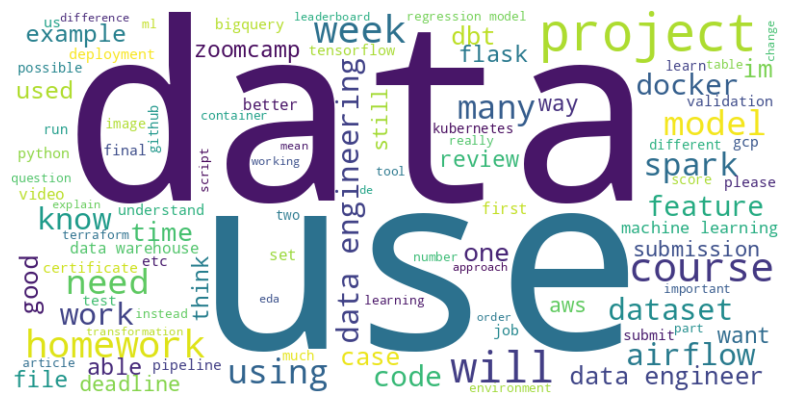

In [170]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(train_dataset['cleaned_question']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


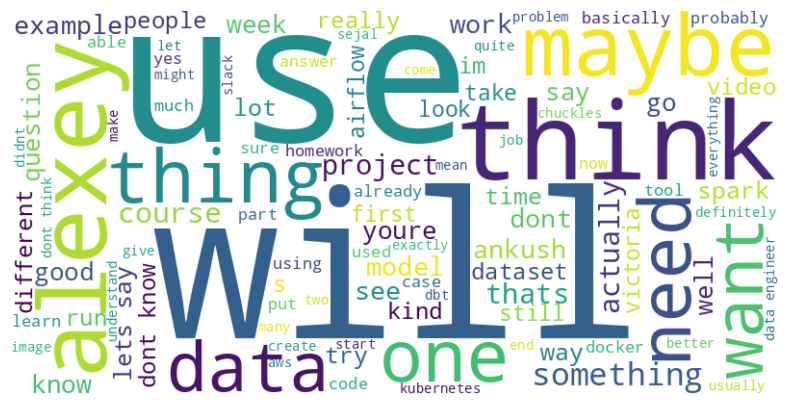

In [171]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(train_dataset['cleaned_answer']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [172]:
test_question = pd.read_csv('test_questions.csv',encoding='utf-8')
test_question.head()

,question_id,question,course,year,candidate_answers
0,707,How much of an effort would it be to use AWS i...,Data Engineering Zoomcamp,2023,"336232,337669,258304,47681,767296"
1,534450,Can you talk about linear regression and regul...,Machine Learning Zoomcamp,2022,"231208,282072,86769,573165,138373"
2,996163,Can you please explain the Python Black setup ...,Data Engineering Zoomcamp,2023,"571892,816559,47681,337669,336232"
3,860215,How many portfolio projects apart from the cou...,Machine Learning Zoomcamp,2022,"643931,988549,918931,235894,608866"
4,980124,Can you talk more about the final project? Wha...,Data Engineering Zoomcamp,2023,"384381,337669,258304,47681,747722"


In [173]:
test_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   question_id        516 non-null    int64 
 1   question           516 non-null    object
 2   course             516 non-null    object
 3   year               516 non-null    int64 
 4   candidate_answers  516 non-null    object
dtypes: int64(2), object(3)
memory usage: 20.3+ KB


In [174]:
test_question['question'] = test_question['question'].apply(round1)

In [175]:
test_question['question'] = test_question['question'].apply(round2)

In [176]:
test_question.head()

,question_id,question,course,year,candidate_answers
0,707,how much of an effort would it be to use aws i...,Data Engineering Zoomcamp,2023,"336232,337669,258304,47681,767296"
1,534450,can you talk about linear regression and regul...,Machine Learning Zoomcamp,2022,"231208,282072,86769,573165,138373"
2,996163,can you please explain the python black setup ...,Data Engineering Zoomcamp,2023,"571892,816559,47681,337669,336232"
3,860215,how many portfolio projects apart from the cou...,Machine Learning Zoomcamp,2022,"643931,988549,918931,235894,608866"
4,980124,can you talk more about the final project what...,Data Engineering Zoomcamp,2023,"384381,337669,258304,47681,747722"


In [177]:
test_question.rename(columns={'question':'cleaned_question'},inplace=True)

In [178]:
test_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   question_id        516 non-null    int64 
 1   cleaned_question   516 non-null    object
 2   course             516 non-null    object
 3   year               516 non-null    int64 
 4   candidate_answers  516 non-null    object
dtypes: int64(2), object(3)
memory usage: 20.3+ KB


In [179]:
columns_to_drop = ['course','year','candidate_answers']
test_question.drop(columns = columns_to_drop, inplace = True)

In [180]:
test_question

,question_id,cleaned_question
0,707,how much of an effort would it be to use aws i...
1,534450,can you talk about linear regression and regul...
2,996163,can you please explain the python black setup ...
3,860215,how many portfolio projects apart from the cou...
4,980124,can you talk more about the final project what...
...,...,...
511,385696,how can we contribute to the course
512,178777,how should i organize my data lake by departm...
513,134025,what java aspects will be covered in the cours...
514,881774,the retries of tasks can be notified or do we ...


In [181]:
test_answer = pd.read_csv('test_answers.csv',encoding='utf-8')
test_answer.head()

,answer_id,answer,course,year,attachments_files
0,767296,Alexey\nProbably more than you want to put in....,Data Engineering Zoomcamp,2023,NaN
1,573165,"Yes, I can. There is actually an entire module...",Machine Learning Zoomcamp,2022,NaN
2,571892,Jeff\nI can try. I like Black a lot. If you ju...,Data Engineering Zoomcamp,2023,NaN
3,988549,"Again, you’ll probably hate me soon for saying...",Machine Learning Zoomcamp,2022,NaN
4,384381,Alexey\nThe first thing about the dataset – wh...,Data Engineering Zoomcamp,2023,NaN


In [182]:
columns_to_drop = ['course','year','attachments_files']
test_answer.drop(columns = columns_to_drop, inplace = True)

In [183]:
test_answer['answer'] = test_answer['answer'].apply(round1)

In [184]:
test_answer['answer'] = test_answer['answer'].apply(round2)

In [185]:
test_answer.head()

,answer_id,answer
0,767296,alexey probably more than you want to put in i...
1,573165,yes i can there is actually an entire module a...
2,571892,jeff i can try i like black a lot if you just ...
3,988549,again you ll probably hate me soon for saying ...
4,384381,alexey the first thing about the dataset what...


In [186]:
test_answer.rename(columns={'answer':'cleaned_answer'},inplace=True)

In [187]:
test_answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   answer_id       516 non-null    int64 
 1   cleaned_answer  516 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


In [188]:
test_dataset = pd.merge(test_question,test_answer, left_index=True, right_index=True, how='inner')

In [189]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   question_id       516 non-null    int64 
 1   cleaned_question  516 non-null    object
 2   answer_id         516 non-null    int64 
 3   cleaned_answer    516 non-null    object
dtypes: int64(2), object(2)
memory usage: 16.2+ KB


In [190]:
test_dataset = test_dataset[['question_id', 'answer_id', 'cleaned_question', 'cleaned_answer']]

In [191]:
train_dataset.rename(columns={'cleaned_answer':'answer','cleaned_question':'question'},inplace=True)

In [192]:
test_dataset.rename(columns={'cleaned_answer':'answer','cleaned_question':'question'},inplace=True)

In [193]:
test_dataset

,question_id,answer_id,question,answer
0,707,767296,how much of an effort would it be to use aws i...,alexey probably more than you want to put in i...
1,534450,573165,can you talk about linear regression and regul...,yes i can there is actually an entire module a...
2,996163,571892,can you please explain the python black setup ...,jeff i can try i like black a lot if you just ...
3,860215,988549,how many portfolio projects apart from the cou...,again you ll probably hate me soon for saying ...
4,980124,384381,can you talk more about the final project what...,alexey the first thing about the dataset what...
...,...,...,...,...
511,385696,366701,how can we contribute to the course,alexey the best way to contribute is to take n...
512,178777,521840,how should i organize my data lake by departm...,alexey ankush will probably be a better person...
513,134025,770524,what java aspects will be covered in the cours...,for spark we use python so its pyspark so what...
514,881774,647021,the retries of tasks can be notified or do we ...,alexey i guess this is related to prefect righ...


In [194]:
train_dataset

,question_id,answer_id,question,answer
0,79062,156400,for categorical target set where the distribut...,alexey should we use something nonstandard the...
1,468946,634887,is there anything that we are not allowed to u...,no i dont think there is anything you cannot u...
2,968800,954016,i have been catching up and have been doing ho...,alexey yes you will be you can submit the proj...
3,688404,3699,could you please explain what code we should l...,alexey i think the question refers to the home...
4,63921,858915,is it just me or does the model have really ba...,dmitry its fine because this is the showcase p...
...,...,...,...,...
400,241788,831391,can the model with the roc auc score of around...,yes it can its really dataset dependent for so...
401,595103,651754,when i click tab in the parentheses of the ipy...,lets say i do import numpy as np and then le...
402,450348,733226,can you please explain the use cases of splunk...,alexey splunk i don t know its not a data war...
403,864660,422297,why did you use in the last question it was n...,yes it was not mentioned but what was mentione...


In [195]:
train_dataset.to_csv("train_dataset.csv")

In [196]:
test_dataset.to_csv("test_dataset.csv")

**2. Train-Test Split:**

**4. Model Training:**

**5. Model Evaluation:**